# Introduction to Computer Vision

You saw how to get started with programming using neural networks to match data to labels, and from there how to infer the rules that can be used to distinguish items. A logical next step is to apply these concepts to computer vision, where we will have a model learn how to recognize content in pictures so it can *“see”* what’s in them.

In this notebook you’ll work with a popular dataset of clothing items and build a model that can differentiate between them, thus *“seeing”* the difference between different types of clothing.

## Neurons for Vision

Each of our images is a set of 784 values (28 × 28) between 0 and 255. They can be our X. We know that we have 10 different types of images in our dataset, so let’s consider them to be our Y. Now we want to learn what the function looks like where Y is a function of X.

Given that we have 784 X values per image, and our Y is going to be between 0 and 9, it’s pretty clear that we cannot do Y = mX + c as we did earlier.

But what we can do is have several neurons working together. Each of these will learn ***parameters***, and when we have a combined function of all of these parameters working together, we can see if we can match that pattern to our desired answer.

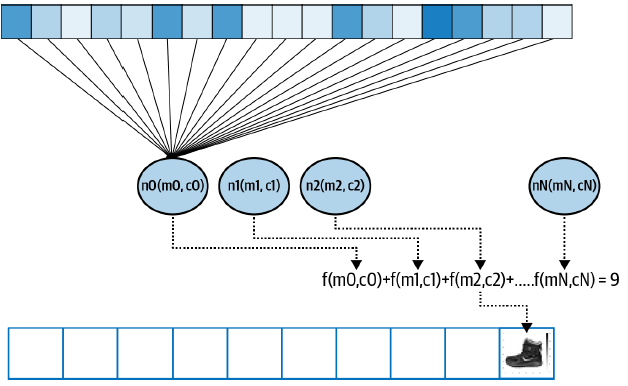

# Build Machine Learning Model for Computer Vision

## Import Libraries

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

## Prepare and Split the Dataset

[Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) is designed to be a drop-in replacement for MNIST that has the
same number of records, the same image dimensions, and the same number of classes —so, instead of images of the digits 0 through 9, Fashion MNIST contains images of 10 different types of clothing.

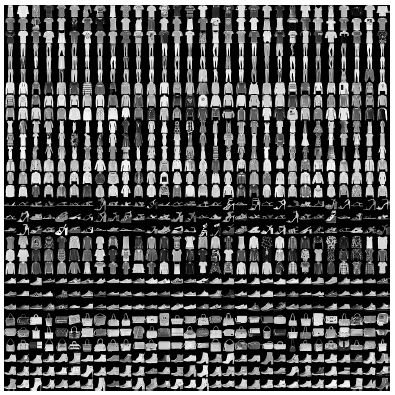

It has a nice variety of clothing, including shirts, trousers, dresses, and lots of types of shoes. As you may notice, it’s monochrome, so each picture consists of a certain number of pixels with values between 0 and 255. This makes the dataset simpler to manage.



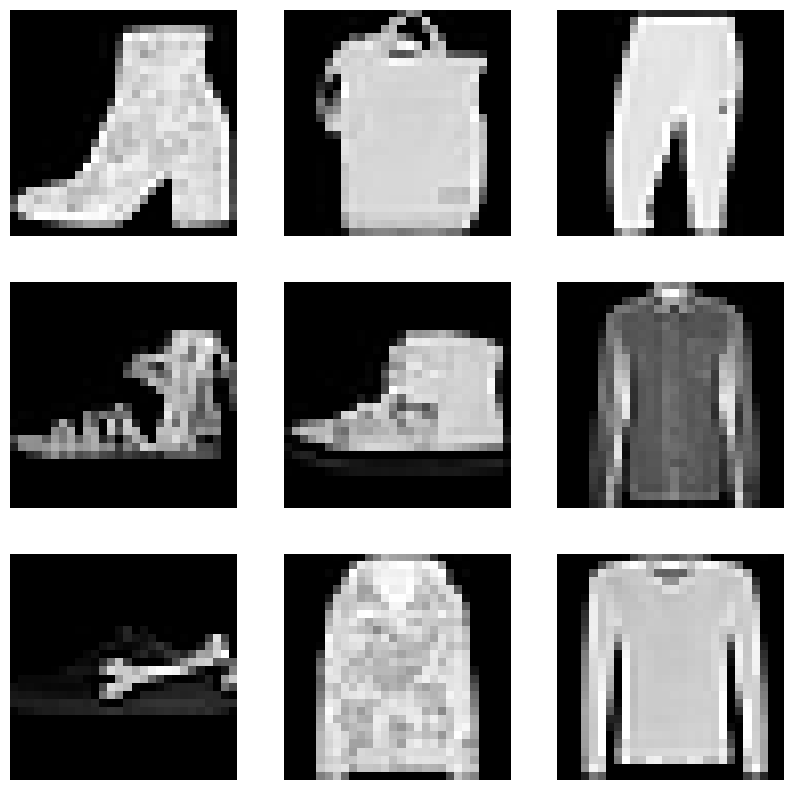

In [25]:
data = tf.keras.datasets.fashion_mnist

# load and split data
(training_images, training_labels), (test_images, test_labels) = data.load_data()

# show few images from training dataset
plt.figure(figsize=(10, 10))

# show a few images from the training data set
for i in range(9):
  image = random.choice(training_images)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image, cmap='gray')
  plt.axis("off")

## Normalize Images

In [26]:
# normalize
training_images  = training_images / 255.0
test_images = test_images / 255.0

# print shape of images
print(training_images[0].shape)
# print(training_images[0])

(28, 28)


## Design the Neural Network



**ReLU** - The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

Softmax - is an activation function that scales numbers/logits into probabilities.

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the Model

In [28]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

## Train the Model

In [29]:
# custom keras callback
class KerasCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95:
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

# create the callback
callback = KerasCallback()

history = model.fit(training_images, training_labels, epochs=60, callbacks=[callback])
# history = model.fit(training_images, training_labels, epochs=60)

Epoch 1/60
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4994 - accuracy: 0.8251
Epoch 2/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3783 - accuracy: 0.8633
Epoch 3/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8780
Epoch 4/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3132 - accuracy: 0.8848
Epoch 5/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.8910
Epoch 6/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2776 - accuracy: 0.8971
Epoch 7/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.9007
Epoch 8/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2557 - accuracy: 0.9041
Epoch 9/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2464 - accuracy: 0.9088
Epoch 10/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.23

## Evaluate the Model

In [30]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8869


[0.42765381932258606, 0.886900007724762]

## Learning Curve

dict_keys(['loss', 'accuracy'])


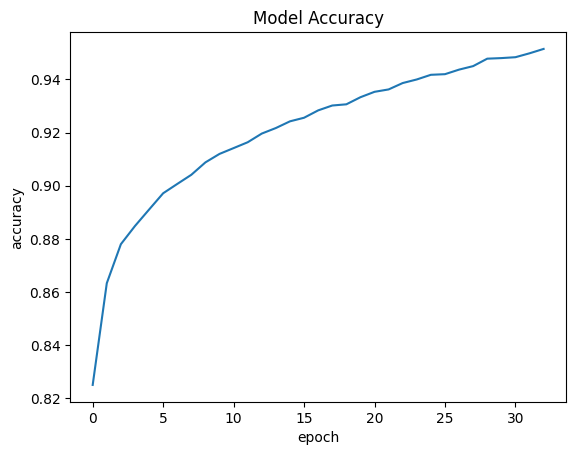

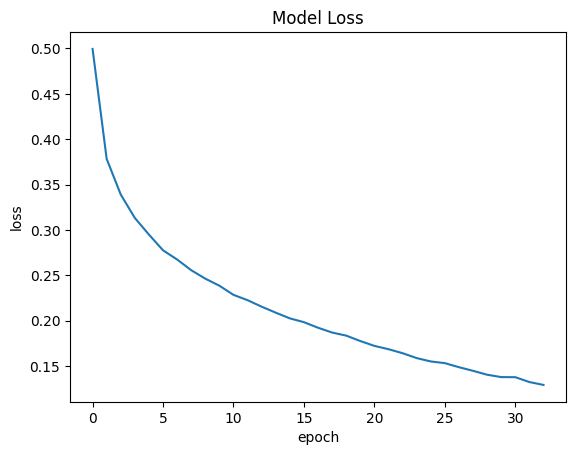

In [31]:
print(history.history.keys())

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# plot accuracy training vs. validation
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# plot loss training vs. validation
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Inference / Prediction

313/313 [==============================] - 1s 2ms/step
2
2


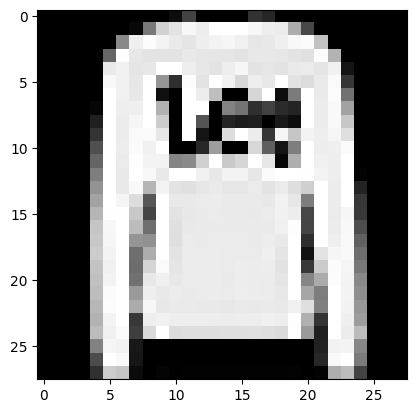

In [32]:
# print the image to classify
plt.imshow(test_images[1], cmap='gray')

classifications = model.predict(test_images)

prediction = np.argmax(classifications[1]) # get the index of highest value
print(prediction) # prediction
print(test_labels[1]) # true value label